<a href="https://colab.research.google.com/github/felipeapellegrini/data_science_portfolio/blob/master/%5BPROJETO%5D_Doen%C3%A7as_Cardiovasculares_(An%C3%A1lise_Explorat%C3%B3ria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [2]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [4]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## Análise Exploratória dos Dados

### Conhecendo o *dataset*

#### Tamanho

Como foi falado anteriormente, o conjunto de dados do da **Cleveland Clinic Foundation** deve possuir 303 entradas e 14 variáveis, abaixo segue uma breve verificação dele.

In [5]:
# verificando o tamanho do dataset
print('Atributos: \t {}'.format(df.shape[1]))
print('Entradas: \t {}'.format(df.shape[0]))

Atributos: 	 14
Entradas: 	 303


#### Descrição estatística do *dataset*

Um breve resumo estatístico que serve para a compreensão sobre como estão distribuídos os valores do conjunto de dados, se existem valores faltantes, ter uma ideia da dispersão dos dados e também perceber através de uma breve análise manual a presença ou não de *outliers*.

Aqui foi percebido que todas as variáveis estão preenchidas para cada um dos 14 atributos. O conjunto de dados está completo.



In [6]:
# descrição estatística com describe()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Tipos de variáveis

Esta etapa serve para conhecer quais os tipos de dados presentes no nosso conjunto (texto, número, booleano...)

Verificamos que as 13 primeiras variáveis são do tipo numérico e racional, enquanto a última é do tipo inteiro, exatamente como já tratamos na primeira fase deste projeto.

In [7]:
# verificando os tipos de dados
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

#### Checando o cabeçalho dos dados

Esta etapa serve para visualizar as primeiras entradas do *dataset*, para começarmos a contextualizar a sua representação, como de fato são esses dados.

Famoso: "tá, mas e a tabela?"

In [8]:
# verificando o cabeçalho dos dados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Enfim, as explorações do *dataset*

#### Contagem de pacientes com e sem doenças cardiovasculares

In [9]:
# verificando quantidade e razão de pacientes com e sem doenças vasculares
contem = df.num.loc[df.num > 0].shape[0]
nao_contem = df.num.loc[df.num == 0].shape[0]

# imprimindo os dados na tela
print('Contem doenças: \t{}'.format(contem))
print('Não contem doenças: \t{}'.format(nao_contem))
print('\n')
print('Contem: \t{}%'.format(round(contem/df.shape[0],ndigits=2)*100))
print('Não contem: \t{}%'.format(round(nao_contem/df.shape[0],ndigits=2)*100))

Contem doenças: 	139
Não contem doenças: 	164


Contem: 	46.0%
Não contem: 	54.0%


#### Verificando valores nulos do *dataset*

Como já foi verificado em outra etapa, não há valores nulos ou missing neste conjunto de dados. 

Este é só mais um método de verificação.

In [10]:
# verificando valores nulos através da soma
df.isnull().sum().sort_values(ascending=False)

num         0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

#### Analisando a tendência de mortes por doenças cardíacas no Brasil

Abaixo segue um trecho de uma entrevista, realizada em julho de 2019, do presidente de uma gigante do fast food falando sobre as vendas aqui no Brasil.

> Então, a concorrência e a crise não prejudicam?

> O fato é que, se o cliente não comer o ****, ele vai comer outra coisa. É muito provável que sejamos a única empresa que, em quatro décadas ou 160 trimestres, registra faturamento que não parou de crescer. São 160 trimestres de evolução constante. Fazemos isso inovando constantemente.

[Fonte](https://epocanegocios.globo.com/Empresa/noticia/2019/07/sao-160-trimestres-de-receita-em-alta-destaca-presidente-do-mcdonalds.html)

Nosso conjunto de dados sobre as mortes por doenças cardiovasculares terminam em 2017, e podemos observar que a partir de 2015 (mesmo período relatado pelo presidente da vendedora de fast food) temos a curva mais inclinada desde o primeiro ano do estudo.

É claro que envolveria muito mais estudo e provavelmente esta hipótese seria rejeitada, mas pode não ser apenas uma infeliz coincidência.


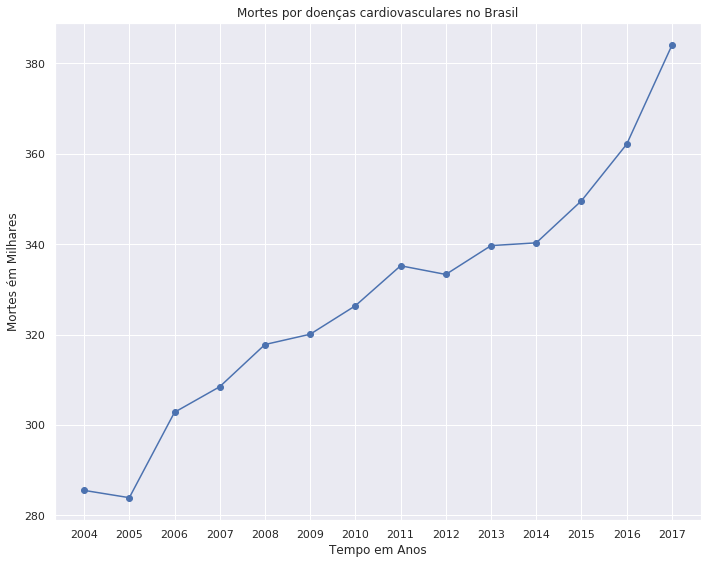

In [16]:
# tendendia de mortes por doença cardíaca no BR

# declarando o estilo seaborn
sns.set()

# construindo plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Mortes por doenças cardiovasculares no Brasil')
ax.set_xlabel('Tempo em Anos')
ax.set_ylabel('Mortes ém Milhares')
ax.set_xticks(df_brasil.ano)
ax.plot(df_brasil.ano, df_brasil.mortes_doencas_cardio, marker = 'o')

plt.tight_layout()

#### Verificando os dados separados por sexo

Como podemos verificar no gráfico abaixo, os homens representam praticamente o dobro das mulheres nesse *dataset*

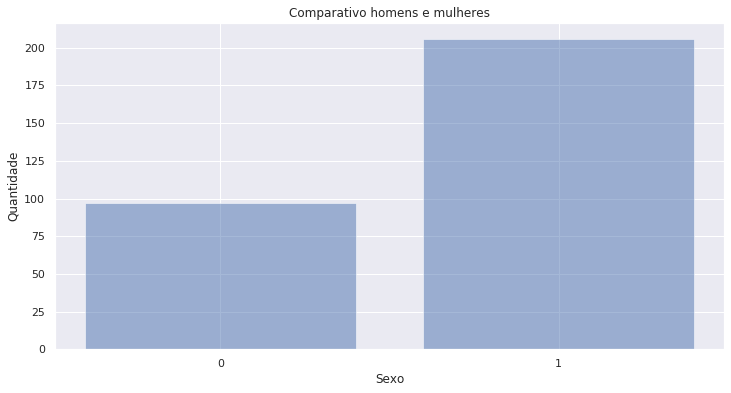

In [12]:
# plotando barras por sexo
df.sex = df.sex.astype(int)

x = df.sex.value_counts().index
y = df.sex.value_counts().values

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x, y, align='center', alpha=0.5)
ax.set_xticks(x)
ax.set_title('Comparativo homens e mulheres')
ax.set_xlabel('Sexo')
ax.set_ylabel('Quantidade')
plt.show()

#### Verificando a correlação entre idade e colesterol sérico

Percebemos facilmente pelo gráfico de dispersão abaixo que não existe uma correlação justa entre idade e colesterol sérico.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


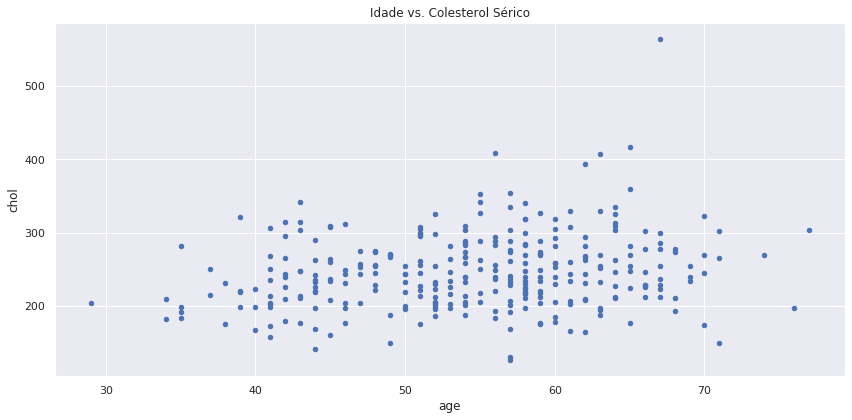

In [13]:
# plot age e chol
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Idade vs. Colesterol Sérico')
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol Sérico')

df.plot.scatter(x='age', y='chol', ax=ax)

plt.tight_layout()

#### Histograma de Colesterol Sérico

Verificamos com esse histograma que existe um valor bem excluído do conjunto. 

Aqui vale a pena uma investigação mais profunda sobre essa entrada.

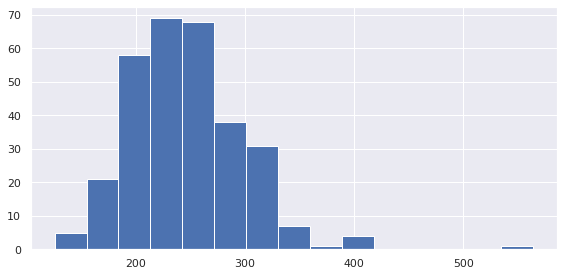

In [14]:
# plotando o histograma com matplotlib
fig, ax = plt.subplots(figsize=(8,4))

ax.hist('chol', bins=15, data=df)
plt.tight_layout()

#### Verificando as correlações do *dataset*

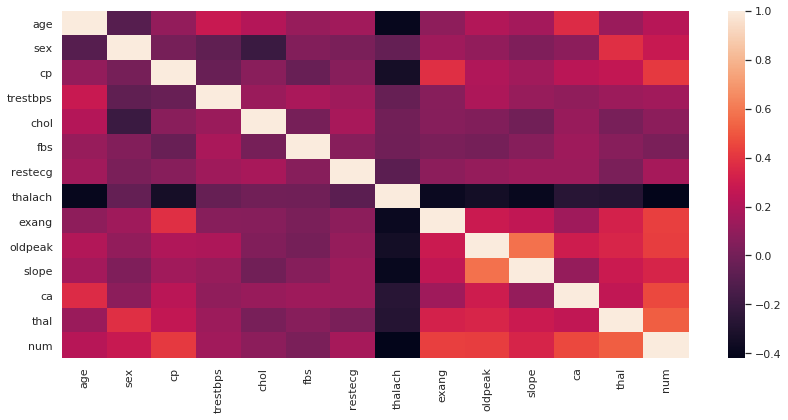

In [15]:
# heatmap de matriz de correlações
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.heatmap(df.corr())
plt.tight_layout()